<a href="https://colab.research.google.com/github/Manthan2110/AI-Powered-Face-Authenticator/blob/main/Models/%20Face_Recognition_using_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install onnxruntime
!pip install deepface
!pip install mtcnn
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=4e533ab3db9b95c7ffe977aa2720d2a1101f00bbda1bafd1fd81fcca8dfe3056
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 

In [ ]:
from deepface import DeepFace
from PIL import Image
import numpy as np
import os
from sklearn.metrics.pairwise import cosine_similarity
import cv2 as cv
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
img = cv.imread('/content/drive/MyDrive/dataset/taylor_swift/9.png')

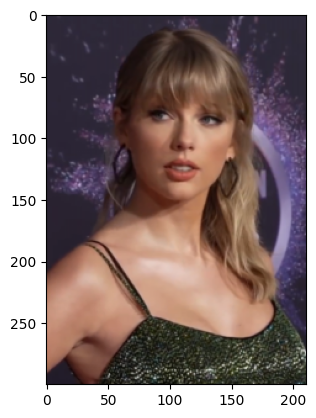

In [ ]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
result = detector.detect_faces(img)

In [ ]:
result

[{'box': [66, 40, 85, 110],
  'confidence': np.float64(0.9962599277496338),
  'keypoints': {'nose': [np.int64(113), np.int64(103)],
   'mouth_right': [np.int64(124), np.int64(126)],
   'right_eye': [np.int64(131), np.int64(84)],
   'left_eye': [np.int64(93), np.int64(81)],
   'mouth_left': [np.int64(95), np.int64(124)]}}]

In [ ]:
x, y, w, h = result[0]['box']

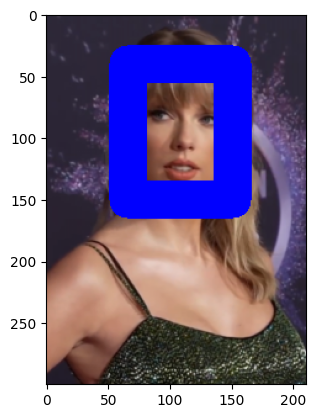

In [ ]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 30)
plt.imshow(img)

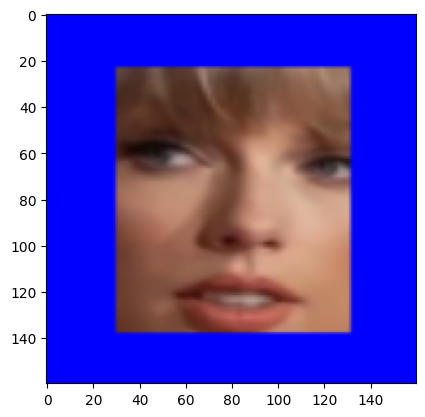

In [ ]:
my_face = img[y:y+h, x:x+w]
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

In [ ]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []           #Used to store faces
        self.Y = []           #Used to store labels
        self.detector = MTCNN()


    def extract_face(self, filename, required_size=(160, 160)): # Changed to self and filename
        try:
            # image = Image.open(filename).convert('RGB')  # Remove this line as it's not needed
            image = Image.open(filename).convert('RGB') # Opening the file here
            pixels = np.asarray(image)
            results = self.detector.detect_faces(pixels) # Changed to self.detector
            if results:
                x1, y1, width, height = results[0]['box']
                x1, y1 = abs(x1), abs(y1)
                x2, y2 = x1 + width, y1 + height
                face = pixels[y1:y2, x1:x2]
                face_image = Image.fromarray(face)
                face_image = face_image.resize(required_size)
                return np.asarray(face_image)
        except Exception as e:
            print(f"Error processing {filename}: {e}")
        return None


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path) # Changed to self
                # Append only if a face was detected
                if single_face is not None:
                    FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [ ]:
# Get embedding directly from image using DeepFace
def get_vgg_embedding(img_path):
    try:
        embedding_obj = DeepFace.represent(
            img_path=img_path,
            model_name='VGG-Face',
            enforce_detection=True
        )
        return embedding_obj[0]["embedding"]
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return None

In [ ]:
# Embedding collection
known_embeddings = {}
dataset_path = '/content/drive/MyDrive/dataset'

for person_folder in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person_folder)
    for filename in os.listdir(person_path):
        full_path = os.path.join(person_path, filename)
        embedding = get_vgg_embedding(full_path)
        if embedding is not None:
            known_embeddings[full_path] = embedding

25-06-14 06:42:15 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:07<00:00, 76.2MB/s]


Error processing /content/drive/MyDrive/dataset/taylor_swift/8.jpg: Face could not be detected in /content/drive/MyDrive/dataset/taylor_swift/8.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error processing /content/drive/MyDrive/dataset/taylor_swift/.ipynb_checkpoints: Confirm that /content/drive/MyDrive/dataset/taylor_swift/.ipynb_checkpoints exists
Error processing /content/drive/MyDrive/dataset/manthan_jadav/1.jpg: Face could not be detected in /content/drive/MyDrive/dataset/manthan_jadav/1.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error processing /content/drive/MyDrive/dataset/manthan_jadav/2.jpg: Face could not be detected in /content/drive/MyDrive/dataset/manthan_jadav/2.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error processing /content/drive/MyDrive/dataset/manthan_jadav/3.jpg: Face could not b

In [ ]:
# Compare embeddings
threshold = 0.7
match_results = {}

file_paths = list(known_embeddings.keys())
embeddings = list(known_embeddings.values())

for i in range(len(file_paths)):
    face_i = embeddings[i]
    matches = []
    for j in range(len(file_paths)):
        if i == j:
            continue
        face_j = embeddings[j]
        sim = cosine_similarity([face_i], [face_j])[0][0]
        if sim > (1 - threshold):  # Similarity above threshold
            matches.append(file_paths[j])
    match_results[file_paths[i]] = matches

In [ ]:
# Input image to match
input_image_path = '/content/drive/MyDrive/dataset/sardor_abdirayimov/6.jpg'

# Display result
if input_image_path in match_results:
    matched_paths = match_results[input_image_path]
    print(f"\nFace from '{input_image_path}' is recognized in:")
    for match in matched_paths:
        print(f"  - {match}")
else:
    print(f"\nNo matches found for face from '{input_image_path}'")


Face from '/content/drive/MyDrive/dataset/sardor_abdirayimov/6.jpg' is recognized in:
  - /content/drive/MyDrive/dataset/sardor_abdirayimov/8.jpg
  - /content/drive/MyDrive/dataset/sardor_abdirayimov/10.jpg
  - /content/drive/MyDrive/dataset/sardor_abdirayimov/7.jpg
  - /content/drive/MyDrive/dataset/sardor_abdirayimov/9.jpg
  - /content/drive/MyDrive/dataset/sardor_abdirayimov/1.jpg
  - /content/drive/MyDrive/dataset/manthan_jadav/16.jpg
